In [222]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Задача 1.
1. Скачать данные
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк

In [223]:
df = pd.read_csv('laptops.csv', sep=',', encoding='latin-1')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### 1.1 Изучите количество памяти с помощью matplotlib
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

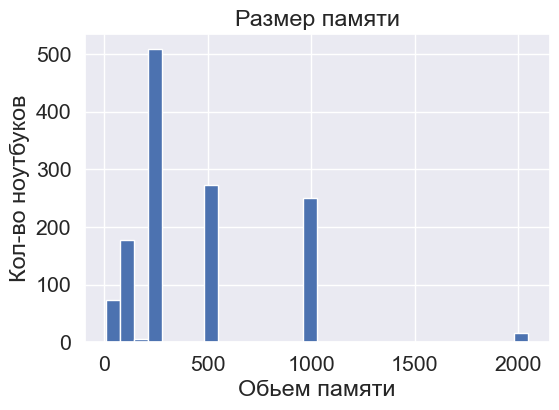

In [224]:
plt.figure(figsize=(6, 4))

plt.hist(df['Memory_Amount'], bins=30)

plt.title('Размер памяти')
plt.xlabel('Обьем памяти')
plt.ylabel('Кол-во ноутбуков');

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

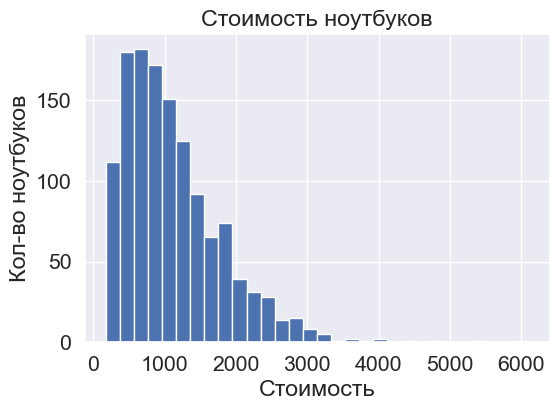

In [225]:
plt.figure(figsize=(6, 4))

plt.hist(df['Price_euros'], bins=30)

plt.title('Стоимость ноутбуков')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во ноутбуков');

### 1.3 Изучите вес ноутбуков с помощью matplotlib
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

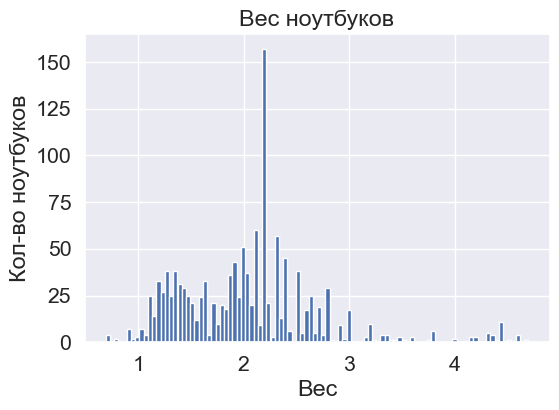

In [226]:
plt.figure(figsize=(6, 4))

plt.hist(df['Weight'], bins=100)

plt.title('Вес ноутбуков')
plt.xlabel('Вес')
plt.ylabel('Кол-во ноутбуков');

# Задача 2.
### 2.1 Изучите распределение типов носителя
Постройте график\
Сделайте выводы

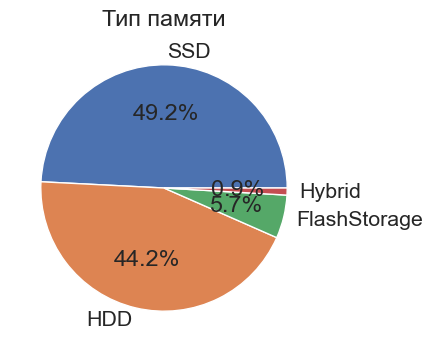

In [227]:
plt.figure(figsize=(6, 4))

memory = df["Memory_Type"].value_counts()
names = memory.index
values = memory.values

plt.pie(values, autopct='%1.1f%%', labels=names)
plt.title('Тип памяти');

### 2.2 Изучите распределение компаний производителей
Постройте график\
Сделайте выводы

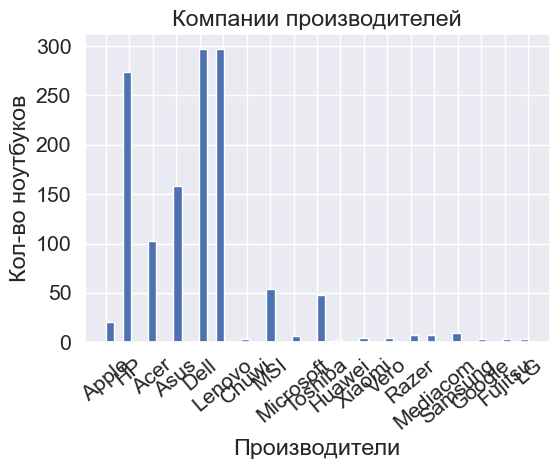

In [228]:
plt.figure(figsize=(6, 4))

plt.hist(df['Company'], bins=50)

plt.title('Компании производителей')
plt.xlabel('Производители')
plt.ylabel('Кол-во ноутбуков')
plt.xticks(rotation=40);

### 2.3 Изучите распределение операционной системы
Постройте график\
Сделайте выводы

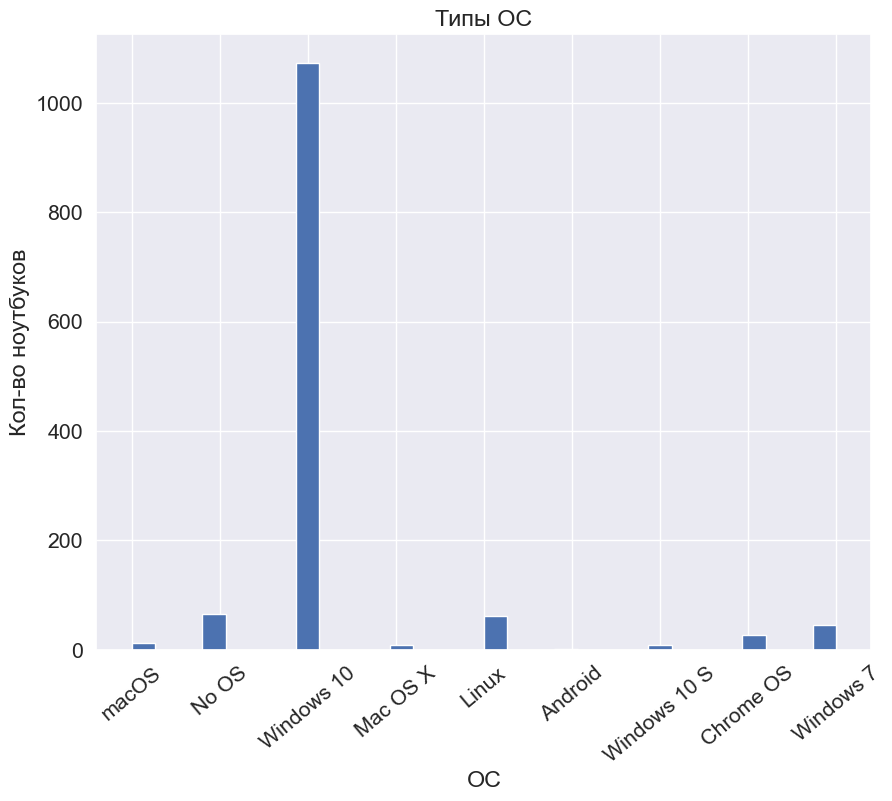

In [230]:
plt.figure(figsize=(10, 8))

plt.hist(df['OpSys'], bins=30)

plt.title('Типы ОС')
plt.xlabel('ОС')
plt.ylabel('Кол-во ноутбуков')
plt.xticks(rotation=40);

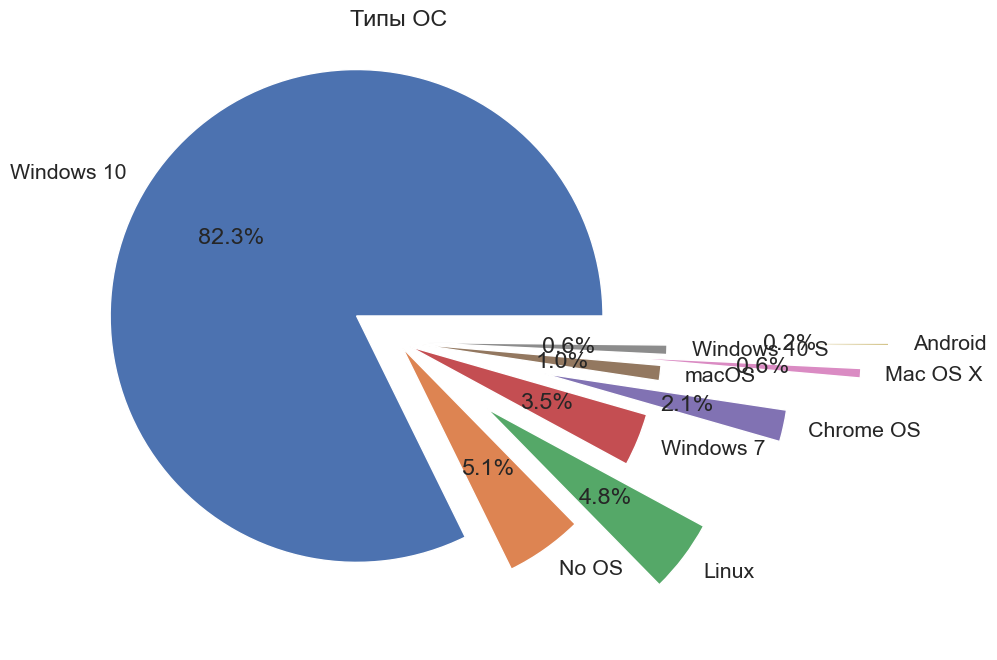

In [231]:
expl = [0.2, 0.03, 0.45, 0.05, 0.60, 0.07, 0.88, 0.09, 0.99]

plt.figure(figsize=(10, 8))

memory = df["OpSys"].value_counts()
names = memory.index
values = memory.values

plt.pie(values, autopct='%1.1f%%', labels=names,explode=expl)
plt.title('Типы ОС');

### 2.4 Изучите распределение компаний производителей CPU
Постройте график\
Сделайте выводы

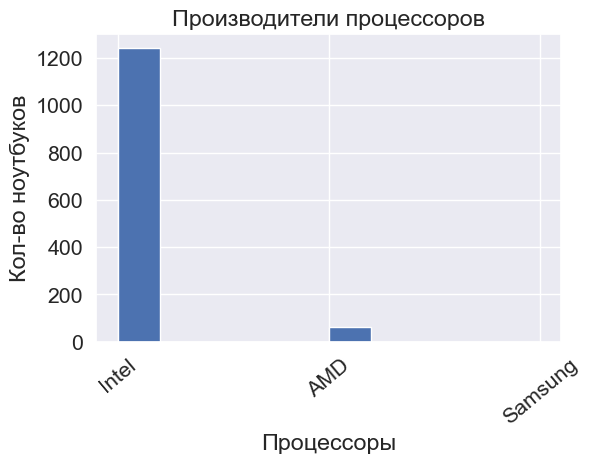

In [232]:
plt.figure(figsize=(6, 4))

plt.hist(df['Cpu_Company'], bins=10)

plt.title('Производители процессоров')
plt.xlabel('Процессоры')
plt.ylabel('Кол-во ноутбуков')
plt.xticks(rotation=40);

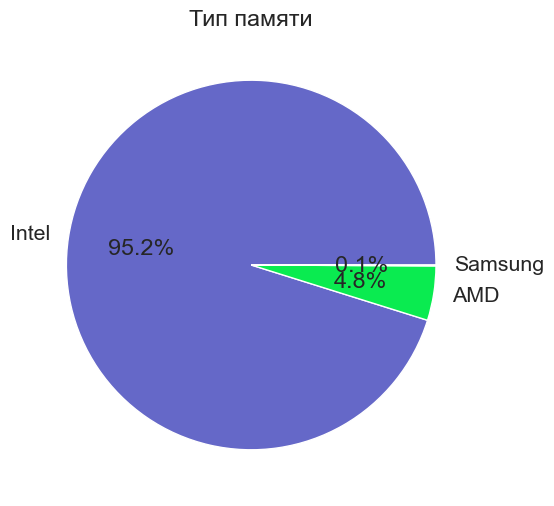

In [233]:
plt.figure(figsize=(8, 6))

memory = df['Cpu_Company'].value_counts()
names = memory.index
values = memory.values

plt.pie(values, autopct='%1.1f%%', labels=names, colors=['#6568C8', '#0AEB50', '#000000'])
plt.title('Тип памяти');

# Задача 3.
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму\
Процессоры от Samsung не изучайте
### 3.1 Постройте график в абсолютных величинах

In [234]:
# Готовим данные для графика
a = pd.crosstab(df['Company'], columns=df['Cpu_Company']).reset_index()
a.drop('Samsung', inplace=True, axis=1)
a

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


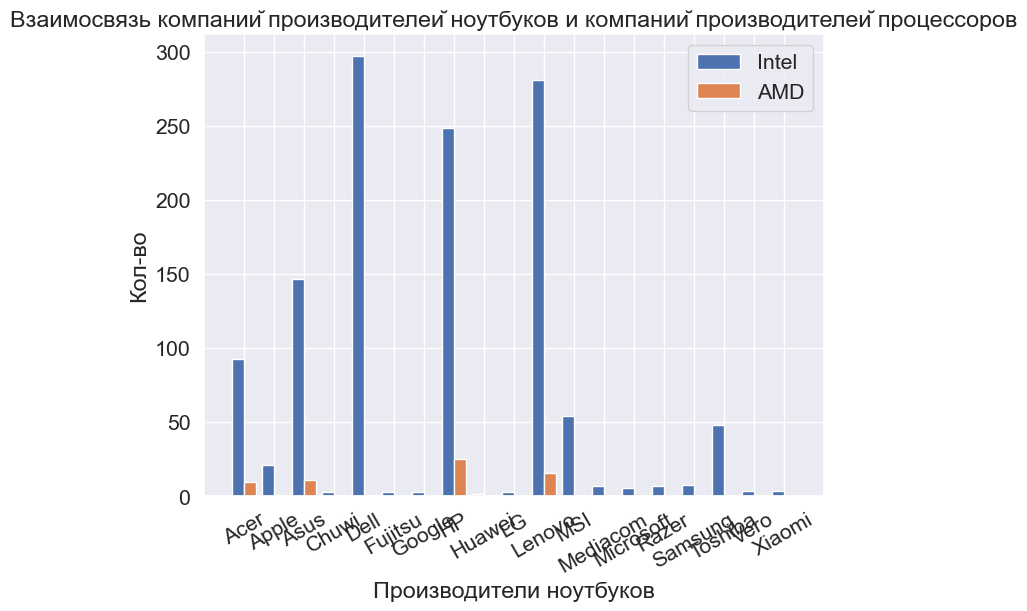

In [235]:
# Строим столбчатую многорядную диаграмму
plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(a['Intel']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, a['Intel'], width=w)
plt.bar(n_ticks + offset, a['AMD'], width=w)

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, a['Company'], rotation = 30); # добавляем метки делений

### 3.2 Постройте график в относительных величинах

In [236]:
# Готовим данные для графика
a = pd.crosstab(df['Company'], columns=df['Cpu_Company'], normalize='index').reset_index()
a.drop('Samsung', inplace=True, axis=1)
a

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


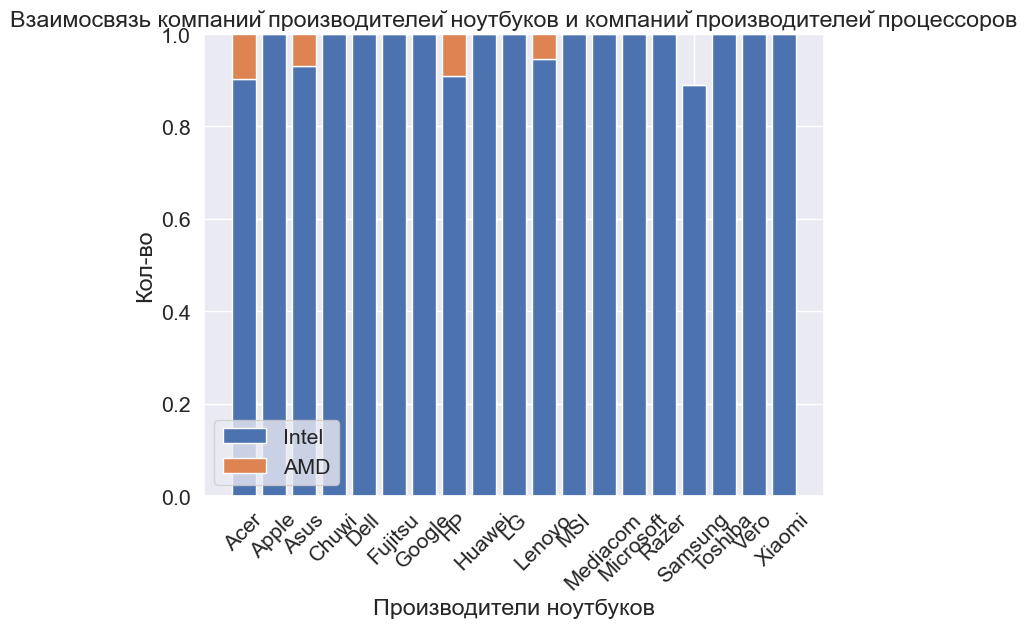

In [237]:
# Строим столбчатую многорядную сложенную диаграмму
plt.figure(figsize=(8, 6))

plt.bar(a['Company'], a['Intel'])
plt.bar(a['Company'], a['AMD'], bottom=a['Intel'])

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(rotation = 45);

# Задача 4.

### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
Постройте график\
Назовите график\
Сделайте именование оси x и оси y\
Сделайте выводы

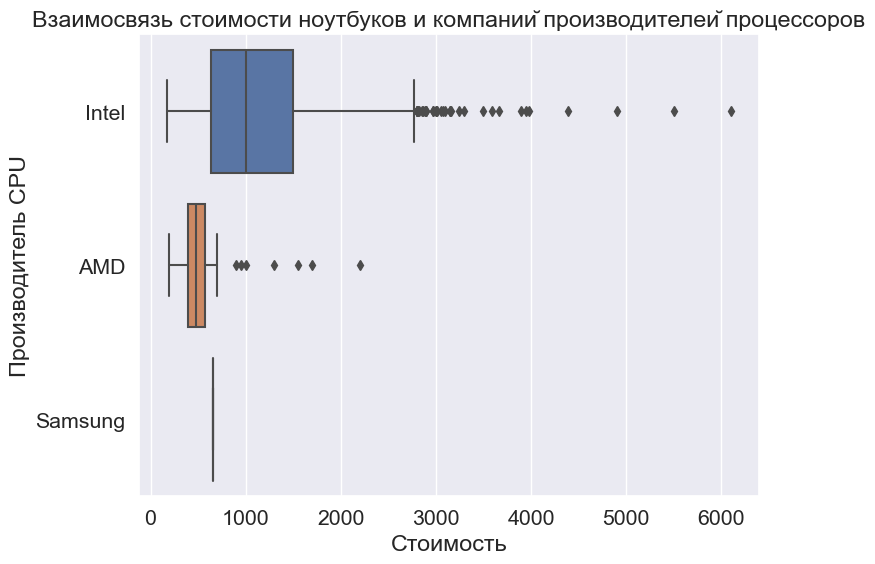

In [238]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], whis=1.5)

plt.title('Взаимосвязь стоимости ноутбуков и компаний производителей процессоров')
plt.xlabel('Стоимость')
plt.ylabel('Производитель СPU');

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти
Постройте график\
Назовите график\
Сделайте именование оси x и оси y\
Сделайте выводы

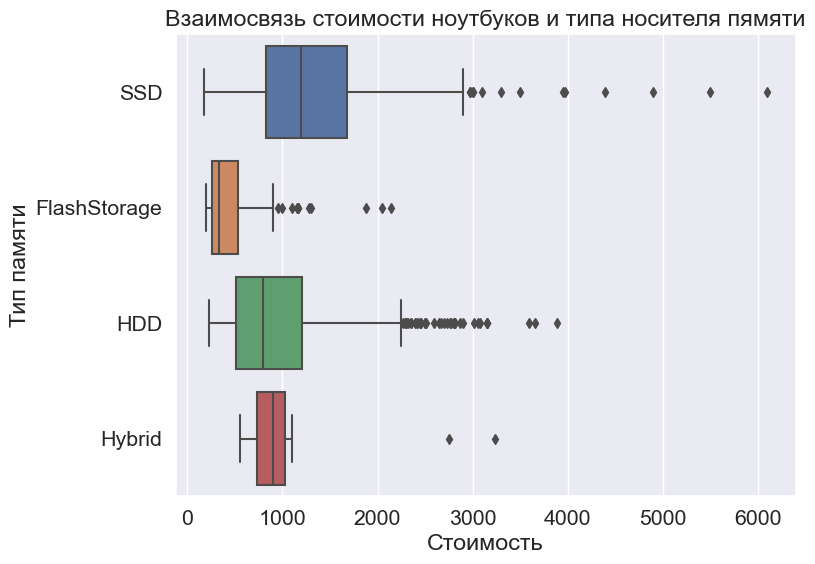

In [239]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], whis=1.5)

plt.title('Взаимосвязь стоимости ноутбуков и типа носителя пямяти')
plt.xlabel('Стоимость')
plt.ylabel('Тип памяти');

In [240]:
df_cut = df[df['Price_euros'] > 6000]
df_cut

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32GB,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0,Intel,1024,SSD


### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти
Постройте график\
Назовите график\
Сделайте именование оси x и оси y\
Сделайте выводы

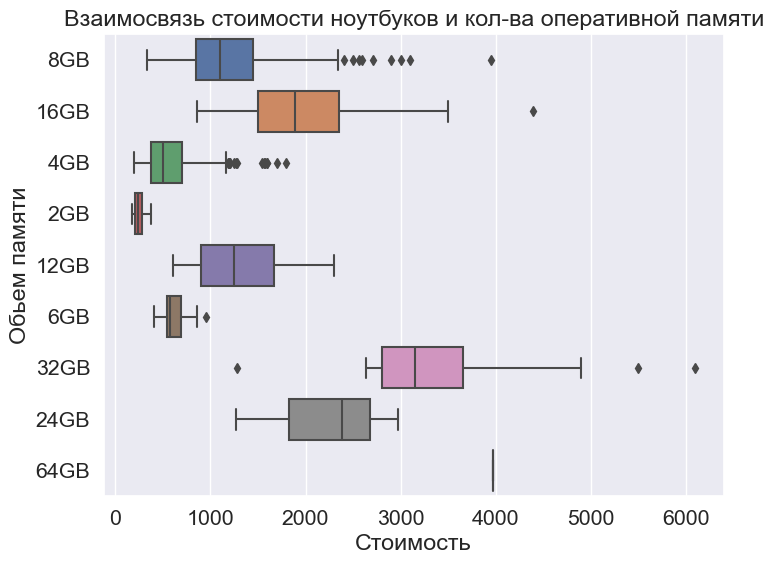

In [241]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['Price_euros'], y=df['Ram'], whis=1.5)

plt.title('Взаимосвязь стоимости ноутбуков и кол-ва оперативной памяти')
plt.xlabel('Стоимость')
plt.ylabel('Обьем памяти');

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя
Постройте график\
Назовите график\
Сделайте именование оси x и оси y\
Сделайте выводы

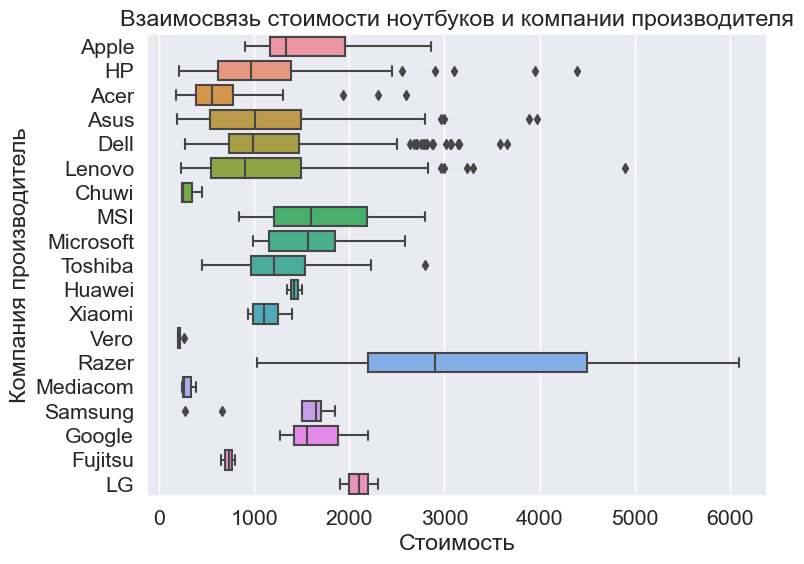

In [242]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['Price_euros'], y=df['Company'], whis=1.5)

plt.title('Взаимосвязь стоимости ноутбуков и компании производителя')
plt.xlabel('Стоимость')
plt.ylabel('Компания производитель');

# Задача 5.
Постройте матрицу кррекляций для таблицы 

In [243]:
b = df[['Inches', 'Memory_Amount', 'Weight', 'Price_euros']]
corr_matrix = b.corr()
corr_matrix[np.abs(corr_matrix) < 0.2] = 0
corr_matrix

,Inches,Memory_Amount,Weight,Price_euros
Inches,1.000000,0.269718,0.827631,0.00000
Memory_Amount,0.269718,1.000000,0.000000,0.00000
Weight,0.827631,0.000000,1.000000,0.21037
Price_euros,0.000000,0.000000,0.210370,1.00000


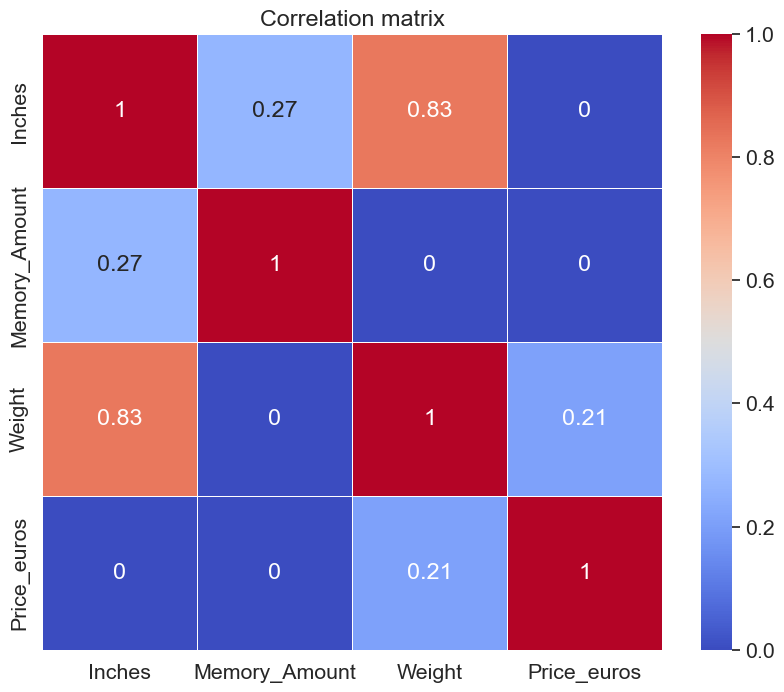

In [244]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

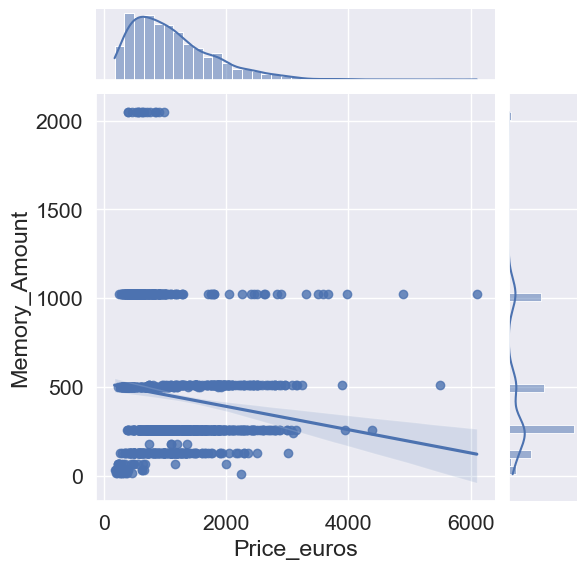

In [245]:
# Корреляция по двум показателям - cтоимость ноутбука и обьем памяти 
sns.jointplot(x=df['Price_euros'], y=df['Memory_Amount'], kind='reg');